<a href="https://colab.research.google.com/github/SibaIssa/Surgical-Instrument-tracking/blob/main/Image%20Preprocessing%20Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dataset:**

In [ ]:
!wget http://ftp.itec.aau.at/datasets/LapGyn4/LapGyn4_v1.2.zip

In [ ]:
!sudo apt install unzip
!unzip LapGyn4_v1.2.zip

In [ ]:
#data_dir = 'LapGyn4_v1.2'
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# **Image Preprocessing:**

## **Noise Reduction:**

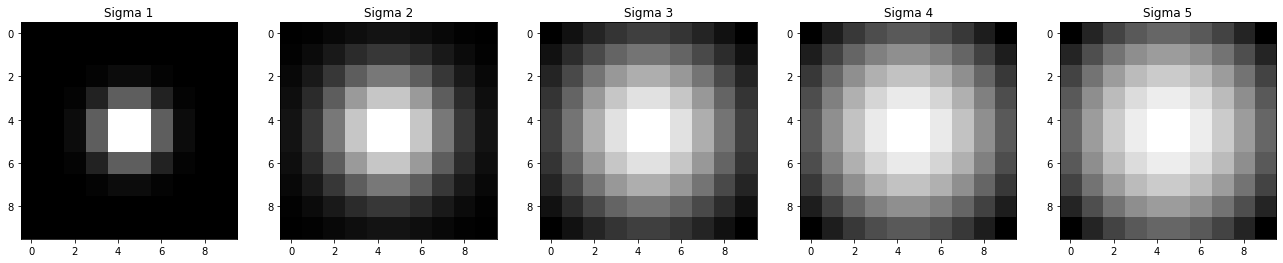

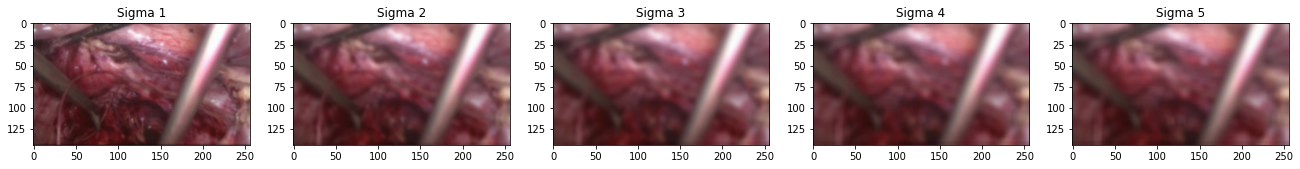

In [ ]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (22.5, 10.5) # (w, h)
import numpy as np
import cv2


def showInRow(list_of_images, titles = None):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
  plt.show()
  

image_bgr = cv2.imread("/content/c_4_v_55_f_2203.jpg", cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) 
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


def getGaussKernel2d(ksize, sigma):
  kern = cv2.getGaussianKernel(ksize, sigma)
  return kern * np.transpose(kern)

max_sigma = 6
kernels = list(map(lambda x: getGaussKernel2d(10, x), range(1, max_sigma)))
kernels_titles = list(map(lambda x: "Sigma "+str(x), range(1, max_sigma)))

image_rgb_small = cv2.resize(image_rgb, None, fx=.4, fy=.4, interpolation = cv2.INTER_CUBIC)
image = list(map(lambda kern: cv2.filter2D(image_rgb_small, -1, kern), kernels))
# cv2.filter2D(): Convolves an image with the kernel.

showInRow(kernels, kernels_titles)
showInRow(image, kernels_titles)

## **Histogram Equalization:**

Histogram type is: <class 'numpy.ndarray'>
Histogram shape is: (256, 1)


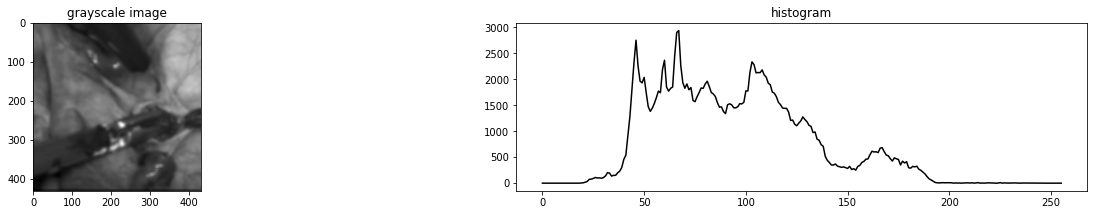

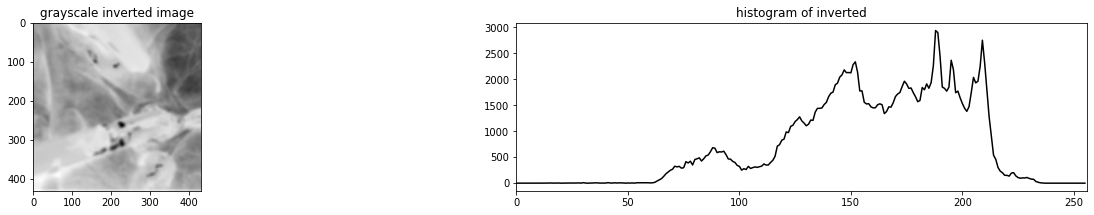

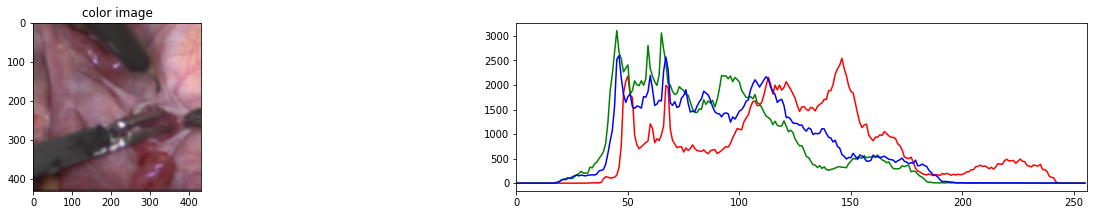

In [ ]:
import cv2 as cv
import numpy as np
img = image[4]
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

equ = cv.equalizeHist(gray)
res = equ #stacking images side-by-side
cv.imwrite('res.jpg',res)

# plot image
plt.subplot(3,2,1)
plt.imshow(gray, cmap = 'gray')
plt.title('grayscale image')

# calculate histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,255])
print('Histogram type is: {}'.format(type(hist)))
print('Histogram shape is: {}'.format(hist.shape))

# plot histogram
plt.subplot(3,2,2)
plt.plot(hist,color = 'black')
plt.title('histogram')
#plt.xlim([0,256])
plt.show()

# plot inversed histogram
image_gray_inv = cv2.bitwise_not(gray)
hist_inv = cv2.calcHist([image_gray_inv],[0],None,[256],[0,255])
plt.subplot(3,2,3)
plt.imshow(image_gray_inv, cmap = 'gray')
plt.title('grayscale inverted image')
#plt.xticks([]),plt.yticks([])

plt.subplot(3,2,4)
plt.plot(hist_inv,color = 'black')
plt.title('histogram of inverted')
plt.xlim([0,256])
plt.show()


plt.subplot(3,2,5)
plt.imshow(image[4])
plt.title('color image')
#plt.xticks([]),plt.yticks([])

plt.subplot(3,2,6)
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([image[4]],[i],None,[256],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()



## **Color Segmentation:**

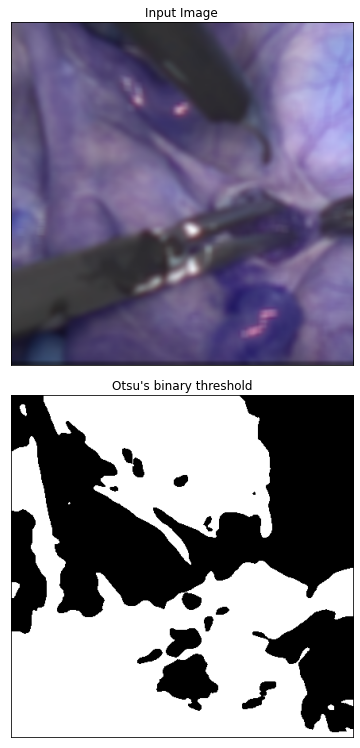

In [ ]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = image[4]
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# **Hough Transformation:**

Streaming output truncated to the last 5000 lines.
(rho,theta): (139.0, 84.00000233751295)
(rho,theta): (192.0, 84.99999667351618)
(rho,theta): (117.0, 88.00000017209338)
(rho,theta): (118.0, 95.00000150525099)
(rho,theta): (73.0, 98.9999993398314)
(rho,theta): (99.0, 98.9999993398314)
(rho,theta): (17.0, 100.00000050602378)
(rho,theta): (35.0, 100.00000050602378)
(rho,theta): (75.0, 100.00000050602378)
(rho,theta): (39.0, 102.99999717441182)
(rho,theta): (94.0, 102.99999717441182)
(rho,theta): (117.0, 102.99999717441182)
(rho,theta): (110.0, 103.99999834060421)
(rho,theta): (62.0, 106.000000672989)
(rho,theta): (111.0, 107.00000183918141)
(rho,theta): (6.0, 107.99999617518463)
(rho,theta): (74.0, 107.99999617518463)
(rho,theta): (89.0, 108.99999734137702)
(rho,theta): (98.0, 108.99999734137702)
(rho,theta): (28.0, 110.99999967376183)
(rho,theta): (82.0, 113.0000020061466)
(rho,theta): (-16.0, 115.00000433853141)
(rho,theta): (-21.0, 118.99999534292266)
(rho,theta): (9.0, 120.000003339

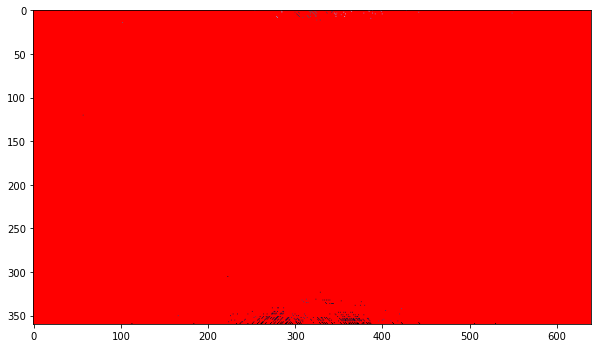

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import sys
if "google.colab" in sys.modules:
    import subprocess
    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_04b_hough_transform/edge_bold.bmp".split()
    )
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_04b_hough_transform/building.jpg".split()
    )


im3 = cv2.imread("/content/c_4_v_55_f_2328.jpg")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
mag_im = cv2.Canny(im, 20, 50)

r_step = 1
t_step = np.pi / 180
TH = 150

lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]
    print("(rho,theta): " + str((rho, theta / np.pi * 180)))
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    res = cv2.line(res, (x1, y1), (x2, y2), (255, 0, 0), thickness=1)

figsize=(10,10)
plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()